imports

In [7]:
import networkx as nx

import graphs

In [8]:
from lib.graphs import G_Witvliet, G_White
G_W1 = G_Witvliet[0]
G_W7 = G_Witvliet[6]
G_W8 = G_Witvliet[7]

%store -r G_SEEM_FC
%store -r RDDAM_Graphs_W1 RDDAM_Graphs_W7 RDDAM_Graphs_W8 RDDAM_Graphs_White rand_Graphs_W1 rand_Graphs_W7 rand_Graphs_W8 rand_Graphs_White SEEM_Array_Witvliet SEEM_White SEEM_Array_Witvliet_Rand SEEM_White_Rand

### Functions

In [9]:
def createOverlapGraph(G, G_compare=G_SEEM_FC):
  G_overlap = nx.create_empty_copy(G)
  # for e in G_compare.edges():
  #   if G.has_edge(e[0],e[1]):
  #     G_overlap.add_edge(e)
  G_overlap.add_edges_from(e for e in G_compare.edges(data=True) if (e[0],e[1]) in G.edges())
  return G_overlap

In [10]:
def getOverlapDist(Gs, cennG):
    return [(createOverlapGraph(cennG, g).number_of_edges())/(cennG.number_of_edges())*100 for g in Gs]

In [11]:
overlapDists1 = {
  'SEEM': getOverlapDist(SEEM_Array_Witvliet[0],G_W1),
  'RDDAM': getOverlapDist(RDDAM_Graphs_W1,G_W1),
  'ERN': getOverlapDist(rand_Graphs_W1,G_W1),
  'REEM': getOverlapDist(SEEM_Array_Witvliet_Rand[0],G_W1)
 }

overlapDists5 = {
  'SEEM': getOverlapDist(SEEM_Array_Witvliet[6],G_W7) + getOverlapDist(SEEM_Array_Witvliet[7],G_W8) + getOverlapDist(SEEM_White,G_White),
  'RDDAM': getOverlapDist(RDDAM_Graphs_W7,G_W7) + getOverlapDist(RDDAM_Graphs_W8,G_W8) + getOverlapDist(RDDAM_Graphs_White,G_White),
  'ERN': getOverlapDist(rand_Graphs_W7,G_W7) + getOverlapDist(rand_Graphs_W8,G_W8) + getOverlapDist(rand_Graphs_White,G_White),
  'REEM': getOverlapDist(SEEM_Array_Witvliet_Rand[6],G_W7) + getOverlapDist(SEEM_Array_Witvliet_Rand[7],G_W8) + getOverlapDist(SEEM_White_Rand,G_White)
 }

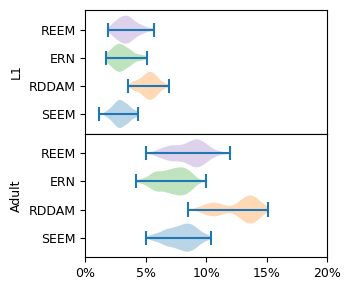

<Figure size 640x480 with 0 Axes>

In [12]:
from lib.style import color
import matplotlib.pyplot as plt
import numpy as np
labels = ['SEEM', 'RDDAM', 'ERN', 'REEM']

def set_axis_style(ax, labels):
    ax.yaxis.set_tick_params(direction='out')
    ax.yaxis.set_ticks_position('left')
    ax.set_yticks(np.arange(1, len(labels) + 1), labels=labels)

def violinPlot():

    plt.rcParams.update({'font.size': 9})

    figSize = (3.3125, 2.7) #if ticks else (1.25, 4)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figSize, sharex=False, sharey=False, layout="constrained")

    fig.get_layout_engine().set(w_pad=0, h_pad=0, hspace=0, wspace=0)

    vplot0 = axes[0].violinplot(overlapDists1.values(), vert=False, widths=1)
    # vplot0 = axes[0][1].violinplot(overlapDists1.values(), vert=False, widths=1)
    vplot1 = axes[1].violinplot(overlapDists5.values(), vert=False, widths=1)
    # vplot1 = axes[1][1].violinplot(overlapDists5.values(), vert=False, widths=1)
    for body0, body1, label in zip(vplot0['bodies'], vplot1['bodies'], labels):
        body0.set_facecolor(color[label])
        body1.set_facecolor(color[label])

    set_axis_style(axes[0], labels)
    set_axis_style(axes[1], labels)
    axes[0].set_xticks([])

    axes[0].set_xlim(0, 20)
    axes[1].set_xlim(0, 20)

    import matplotlib.ticker as mtick

    axes[0].xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    axes[1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

    
    axes[0].set_ylabel('L1', fontsize=9)
    axes[1].set_ylabel('Adult', fontsize=9)


    plt.savefig(f'data/images/overlaps.pgf', format='pgf', dpi=300)

    plt.show()
    plt.clf()

violinPlot()

In [9]:
print((createOverlapGraph(G_W1)).number_of_edges()/G_W1.number_of_edges())
print((createOverlapGraph(G_W7)).number_of_edges()/G_W7.number_of_edges())
print((createOverlapGraph(G_W8)).number_of_edges()/G_W8.number_of_edges())
print((createOverlapGraph(G_White)).number_of_edges()/G_White.number_of_edges())
print('\n')
print((createOverlapGraph(G_W1, RDDAM_Graphs_W1[0])).number_of_edges())
print((createOverlapGraph(G_W7, RDDAM_Graphs_W7[0])).number_of_edges())
print((createOverlapGraph(G_W8, RDDAM_Graphs_W8[0])).number_of_edges())
print((createOverlapGraph(G_White, RDDAM_Graphs_White[0])).number_of_edges())


0.2915811088295688
0.3218197135636057
0.33277870216306155
0.33104238258877433


24
155
142
85


In [9]:
def createWrongGraph(G, H=G_SEEM_FC):
  # G_wrong = nx.difference(G, G_compare)
  # return G_wrong
  G_missing = G.copy()
  G_missing.remove_edges_from(e for e in G.edges(data='distance') if e in H)
  return G_missing

In [10]:
def createMissingGraph(G, H=G_SEEM_FC):
  # G_missing = nx.difference(G_compare, G)
  G_missing = G.copy()
  G_missing.remove_edges_from(e for e in H.edges(data='distance') if e in G)
  return G_missing

In [11]:
def combineGraphs(G, H):
  U=nx.Graph()
  U.add_edges_from(G.edges(data=True))
  U.add_nodes_from(G.nodes(data=True))
  U.add_edges_from(H.edges(data=True))
  U.add_nodes_from(H.nodes(data=True))
  return U

### Overlaps between Adult Connectomes

In [22]:
G_overlap_W7_W8_White = createOverlapGraph(createOverlapGraph(G_W7, G_W8), G_White)

G_overlap_W7_W8 = createWrongGraph(createOverlapGraph(G_W7, G_W8), G_overlap_W7_W8_White)
G_overlap_W7_White = createWrongGraph(createOverlapGraph(G_W7, G_White), G_overlap_W7_W8_White)
G_overlap_W8_White = createWrongGraph(createOverlapGraph(G_W8, G_White), G_overlap_W7_W8_White)

G_unique_W7 = createWrongGraph(createWrongGraph(G_W7, G_W8),G_White)
G_unique_W8 = createWrongGraph(createWrongGraph(G_W8, G_W7),G_White)
G_unique_White = createWrongGraph(createWrongGraph(G_White, G_W7),G_W8)

G_1of3 = combineGraphs(combineGraphs(G_unique_W7, G_unique_W8), G_unique_White)
G_2of3 = combineGraphs(combineGraphs(G_overlap_W7_W8, G_overlap_W7_White), G_overlap_W8_White)

%store G_overlap_W7_W8
%store G_overlap_W7_White
%store G_overlap_W8_White
%store G_overlap_W7_W8_White
%store G_unique_W7
%store G_unique_W8
%store G_unique_White
%store G_1of3
%store G_2of3


dataDir_Overlaps = 'data/overlaps'
nx.write_gexf(G_overlap_W7_W8, f'{dataDir_Overlaps}/overlap_W7_W8.gexf')
nx.write_gexf(G_overlap_W7_White, f'{dataDir_Overlaps}/overlap_W7_White.gexf')
nx.write_gexf(G_overlap_W8_White, f'{dataDir_Overlaps}/overlap_W8_White.gexf')
nx.write_gexf(G_overlap_W7_W8_White, f'{dataDir_Overlaps}/overlap_W7_W8_White.gexf')
nx.write_gexf(G_unique_W7, f'{dataDir_Overlaps}/unique_W7.gexf')
nx.write_gexf(G_unique_W8, f'{dataDir_Overlaps}/unique_W8.gexf')
nx.write_gexf(G_unique_White, f'{dataDir_Overlaps}/unique_White.gexf')


Stored 'G_overlap_W7_W8' (DiGraph)
Stored 'G_overlap_W7_White' (DiGraph)
Stored 'G_overlap_W8_White' (DiGraph)
Stored 'G_overlap_W7_W8_White' (DiGraph)
Stored 'G_unique_W7' (DiGraph)
Stored 'G_unique_W8' (DiGraph)
Stored 'G_unique_White' (DiGraph)
Stored 'G_1of3' (Graph)
Stored 'G_2of3' (Graph)


In [15]:
# G_overlap_W7_W8_White = createOverlapGraph(createOverlapGraph(G_W7, G_W8), G_White)

# G_overlap_W7_W8 = createWrongGraph(createOverlapGraph(G_W7, G_W8), G_overlap_W7_W8_White)
# G_overlap_W7_White = createWrongGraph(createOverlapGraph(G_W7, G_White), G_overlap_W7_W8_White)
# G_overlap_W8_White = createWrongGraph(createOverlapGraph(G_W8, G_White), G_overlap_W7_W8_White)

# G_unique_W7 = createWrongGraph(createWrongGraph(G_W7, G_W8),G_White)
# G_unique_W8 = createWrongGraph(createWrongGraph(G_W8, G_W7),G_White)
# G_unique_White = createWrongGraph(createWrongGraph(G_White, G_W7),G_W8)

# G_1of3 = combineGraphs(combineGraphs(G_unique_W7, G_unique_W8), G_unique_White)
# G_2of3 = combineGraphs(combineGraphs(G_overlap_W7_W8, G_overlap_W7_White), G_overlap_W8_White)
import networkx as nx

from lib.graphs import G_Witvliet, G_White, getCleanGraph
G_W1 = G_Witvliet[0]
G_W7 = G_Witvliet[6]
G_W8 = G_Witvliet[7]

G_clean = getCleanGraph()

%store -r SEEM_Array_Witvliet
%store -r RDDAM_Graphs_W1
%store -r rand_Graphs_W1



for arr_G in [SEEM_Array_Witvliet[0],RDDAM_Graphs_W1,rand_Graphs_W1]:
  G_overlap = nx.create_empty_copy(G_W1)
  for G in arr_G:
    G_overlap = combineGraphs(createOverlapGraph(G_W1, G), G_overlap)
  print('Overlap: ',G_overlap.number_of_edges(),'/',G_W1.number_of_edges())

# distSeqs = {
#     'CENN': avgDistDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
#     'SEEM': avgDistDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
#     'RDDAM': avgDistDist(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White,title='RDDAM', presentation=False, subplot=True),
#     'Erdos-Renyi': avgDistDist(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White,title='Erdos-Renyi', presentation=False, subplot=True)
# }

# %store G_overlap_W7_W8
# %store G_overlap_W7_White
# %store G_overlap_W8_White
# %store G_overlap_W7_W8_White
# %store G_unique_W7
# %store G_unique_W8
# %store G_unique_White
# %store G_1of3
# %store G_2of3


# dataDir_Overlaps = 'data/overlaps'
# nx.write_gexf(G_overlap_W7_W8, f'{dataDir_Overlaps}/overlap_W7_W8.gexf')
# nx.write_gexf(G_overlap_W7_White, f'{dataDir_Overlaps}/overlap_W7_White.gexf')
# nx.write_gexf(G_overlap_W8_White, f'{dataDir_Overlaps}/overlap_W8_White.gexf')
# nx.write_gexf(G_overlap_W7_W8_White, f'{dataDir_Overlaps}/overlap_W7_W8_White.gexf')
# nx.write_gexf(G_unique_W7, f'{dataDir_Overlaps}/unique_W7.gexf')
# nx.write_gexf(G_unique_W8, f'{dataDir_Overlaps}/unique_W8.gexf')
# nx.write_gexf(G_unique_White, f'{dataDir_Overlaps}/unique_White.gexf')

Overlap:  338 / 487
Overlap:  427 / 487
Overlap:  436 / 487


In [13]:
print('Unique Edges (W7):\t\t', G_unique_W7.number_of_edges())
print('Unique Edges (W8):\t\t', G_unique_W8.number_of_edges())
print('Unique Edges (White):\t\t', G_unique_White.number_of_edges())

print('Overlapping Edges (W7, W8):\t', G_overlap_W7_W8.number_of_edges())
print('Overlapping Edges (W&, White):\t', G_overlap_W7_White.number_of_edges())
print('Overlapping Edges (W8, White):\t', G_overlap_W8_White.number_of_edges())

print('Overlapping Edges (All):\t', G_overlap_W7_W8_White.number_of_edges())



Unique Edges (W7):		 263
Unique Edges (W8):		 281
Unique Edges (White):		 184
Overlapping Edges (W7, W8):	 298
Overlapping Edges (W&, White):	 66
Overlapping Edges (W8, White):	 63
Overlapping Edges (All):	 560


### How Predictive is SEEM Connectivity Compared with all 8 Witvliet Connectomes?

In [14]:
overlaps_array = [] # found in both SEEM and CE
wrong_array = [] # found in SEEM but not in CE
missing_array = [] # found in CE but not in SEEM

for i in range(1,9):
  dataDir_W = f'data/Witvliet/d{i}/original'
  G = nx.read_gexf(f'{dataDir_W}/xyz_d.gexf')
  overlaps_array.append(createOverlapGraph(G)) 
  wrong_array.append(createWrongGraph(G))
  missing_array.append(createMissingGraph(G))


In [15]:
correct = [0,0,0,0,0,0,0,0,0]

for edge in G_SEEM_FC.edges():
  i = 0
  for g in overlaps_array:
    if g.has_edge(*edge):
      i += 1
  correct[i] += 1

for i in range(0,9):
  print(f'{i}/8 overlap: ', correct[i])

0/8 overlap:  6413
1/8 overlap:  315
2/8 overlap:  149
3/8 overlap:  101
4/8 overlap:  82
5/8 overlap:  73
6/8 overlap:  57
7/8 overlap:  56
8/8 overlap:  130


Finding the # of Edges in each SEEM Connectome

In [16]:
graphList = []

for i in range(1,9):
  dataDir_W = f'data/witvliet/d{i}/original'
  G = nx.read_gexf(f'{dataDir_W}/xyz_d.gexf')
  graphList.append(G)

print("# of Edges found in each SEEM Connectome")
for i in range(0,8):
  print(f'Connectome #{i+1}:',graphList[i].number_of_edges())

# of Edges found in each SEEM Connectome
Connectome #1: 487
Connectome #2: 613
Connectome #3: 625
Connectome #4: 736
Connectome #5: 952
Connectome #6: 887
Connectome #7: 1187
Connectome #8: 1202


Compute the overlap between the SEEM connectome and the 8 Witvliet connectomes.
- 1/8 overlap -> connection found in one connectome and SEEM
- 8/8 overlap -> connection found in all 8 connectomes and SEEM

In [17]:
common_graph = nx.create_empty_copy(G_SEEM_FC)
for i in range(8):
  G = graphList[i]
  for node in G.nodes():
    if not G_SEEM_FC.has_node(node):
      G.remove_node(node)
  common_graph.add_edges_from(G.edges())

common_edges = [0,0,0,0,0,0,0,0,0]

for edge in common_graph.edges():
  count = 0
  for i in range(8):
    G = graphList[i]
    if G.has_edge(*edge):
      count += 1
  common_edges[count] += 1

for i in range(9):
  print(f'{i}/8 overlap: ', common_edges[i])

0/8 overlap:  0
1/8 overlap:  670
2/8 overlap:  295
3/8 overlap:  188
4/8 overlap:  130
5/8 overlap:  118
6/8 overlap:  111
7/8 overlap:  111
8/8 overlap:  289


In [18]:
for i in range(1,9):
  print(f'{i}/8 overlap: ', correct[i]/common_edges[i])
G_overlap_W1 = nx.create_empty_copy(G)
G_overlap_W1.add_edges_from(n for n in G_SEEM_FC.edges() if n in G_W1.edges())

nx.write_gexf(G_overlap_W1, f'data/overlaps/W131_Overlap.gexf')

%store G_overlap_W1

1/8 overlap:  0.4701492537313433
2/8 overlap:  0.5050847457627119
3/8 overlap:  0.5372340425531915
4/8 overlap:  0.6307692307692307
5/8 overlap:  0.6186440677966102
6/8 overlap:  0.5135135135135135
7/8 overlap:  0.5045045045045045
8/8 overlap:  0.44982698961937717
Stored 'G_overlap_W1' (DiGraph)


#### Create Unique Graphs between SEEM and Witvliet #1

In [19]:
G_uniqueOG_W1 = nx.difference(G_W1, G_SEEM_FC)

nx.write_gexf(G_uniqueOG_W1, 'data/witvliet/d1/compiled/Comparison/W131_Unique_OG_W1.gexf')

%store G_uniqueOG_W1

Stored 'G_uniqueOG_W1' (DiGraph)


In [20]:
G_uniqueSEEM_W1 = nx.difference(G_SEEM_FC, G_W1)

nx.write_gexf(G_uniqueSEEM_W1, 'data/witvliet/d1/compiled/Comparison/W131_Unique_SEEM_W1.gexf')

%store G_uniqueSEEM_W1

Stored 'G_uniqueSEEM_W1' (DiGraph)


#### Create Overlap Graph between RDDAM and Witvliet #1

In [21]:
G_rddam_fc = nx.DiGraph()

for g in RDDAM_Graphs_W1:
  G_rddam_fc.add_edges_from(g.edges())

print(G_rddam_fc.number_of_edges())

G_overlap_W1_rddam = nx.create_empty_copy(G)
G_overlap_W1_rddam.add_edges_from(n for n in G_rddam_fc.edges() if n in G_W1.edges())

nx.write_gexf(G_overlap_W1_rddam, f'data/witvliet/d1/compiled/Comparison/W131_RDDAM_Overlap_W1.gexf')

%store G_overlap_W1_rddam

15978
Stored 'G_overlap_W1_rddam' (DiGraph)


#### Calculate the Penpals that are empirically found in C. Elegans

In [22]:
overlapPP = []
wrongPP = []

for i in range(1,9):
  dataDir= f'data/Witvliet/d{i}'
  G_PP = nx.read_gexf(f'{dataDir}/compiled/penpalSubgraph.gexf')
  G_OG = nx.read_gexf(f'{dataDir}/original/xyz_d.gexf')
  overlapPP.append(createOverlapGraph(G_PP, G_OG))
  wrongPP.append(createWrongGraph(G_PP, G_OG))

%store overlapPP
%store wrongPP

Stored 'overlapPP' (list)
Stored 'wrongPP' (list)


In [23]:
%store -r overlapPP
G_TotalOverlap = nx.create_empty_copy(G_SEEM_FC)
for g in overlapPP:
  G_TotalOverlap.add_edges_from(g.edges())

%store -r wrongPP
G_TotalWrongPP = nx.create_empty_copy(G_SEEM_FC)
for g in wrongPP:
  G_TotalWrongPP.add_edges_from(g.edges())

print('Penpal connection which exist in C.E.:\t\t',G_TotalOverlap.number_of_edges())
print('Penpal connection which do not exist in C.E.:\t',G_TotalWrongPP.number_of_edges())

Penpal connection which exist in C.E.:		 23
Penpal connection which do not exist in C.E.:	 128


### Total empirical overlap between SEEM and Witvliet connectomes

In [24]:
U = nx.Graph()

for i in range(1,9):
  dataDir= f'data/witvliet/d{i}'
  G = nx.read_gexf(f'{dataDir}/original/xyz_d.gexf')
  U.add_edges_from(n for n in G.edges() if n in G_SEEM_FC.edges())

print(f'All possible SEEM connections: {G_SEEM_FC.number_of_edges()}')
print(f'Connections in Union between SEEM and CE Graph: {U.number_of_edges()}')


All possible SEEM connections: 7376
Connections in Union between SEEM and CE Graph: 759
